In [ ]:
'''
В рамках проекта этого модуля вам будет необходимо научиться предсказывать с помощью модели линейной регрессии итоговую оценку ученика в году.

Для решения задачи есть набор данных с информацией про успеваемость по математике 395
 учеников двух португальских школ. Каждый ученик описывается большим набором факторов, подробное описание которых приведено дальше. Данные были собраны в период 2005–2006
 учебного года.

 P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5–12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
'''

In [ ]:
'''
Данные для решения проектной задачи представляются в файле student-mat.csv.

В Португалии учебный год разбит на три периода обучения поменьше, и в конце каждого из них ученики получают оценку по предмету. Итоговой оценкой по предмету в году считается оценка, полученная в конце третьего периода обучения. Для каждого ученика её значение находится в колонке G3. Именно эту характеристику необходимо научиться предсказывать.

Подробное описание остальных факторов приведено ниже. В скобках указан тип и возможные значения каждого фактора.

school — школа, в которой учится ученик (бинарный: GP — Gabriel Pereira или MS — Mousinho da Silveira).
gender — пол ученика (бинарный: F — женский или M — мужской).
age — возраст ученика (численный: от 15 до 22).
address — тип местности, в которой живёт ученик (бинарный: U — город или R — пригород).
famsize — размер семьи (бинарный: LE3 — «не больше 3 человек» или GT3 — «больше 3 человек»).
Pstatus — семейный статус родителей (бинарный: T — «живут вместе» или A — «живут раздельно»).
Medu — образование матери (численный: 0 — «нет образования», 1 — «начальная школа» (4 класса), 2 — «от 5 до 9 классов», 3 — «среднее образование» или 4 — «высшее образование»).
Fedu — образование отца (численный: 0 — «нет образования», 1 — «начальная школа» (4 класса), 2 — «от 5 до 9 классов», 3 — «среднее образование» или 4 — «высшее образование»).
Mjob — работа матери (категориальный: teacher — «учитель», health — «работа в здравоохранении», services — «гражданская служба», at_home — «домохозяйка» или другое — «другое»).
Fjob — работа отца (категориальный: teacher — «учитель», health — «работа в здравоохранении», services — «гражданская служба», at_home — «домохозяин» или другое — «другое»).
reason — причина выбора этой школы (категориальный: home — «близко к дому», reputation — «репутация школы», course — «выбор предметов» или other — «другое»).
guardian — попечитель ученика (категориальный: mother — «мать», father — «отец» или other — «кто-то другой»).
traveltime — время в пути от дома до школы (численный: 1 — «меньше 15 минут», 2 — «от 15 до 30 минут», 3 — «от 30 минут до 1 часа» или 4 — «больше 1 часа»).
studytime — время на учёбу в неделю (численный: 1 — «меньше 2 часов», 2 — «от 2 до 5 часов», 3 — «от 5 до 10 часов» или 4 — «больше 10 часов»).
failures — число незачётов по предмету в прошлом (численный: от 0 до 3).
schoolsup — дополнительная образовательная поддержка (бинарный: yes — да или no — нет).
famsup — дополнительная семейная поддержка (бинарный: yes — да или no — нет).
paid — дополнительные занятия по предмету (бинарный: yes — да или no — нет).
activities — внеучебная деятельность (бинарный: yes — да или no — нет).
nursery — ходил в подготовительную школу (бинарный: yes — да или no — нет).
higher — планирует получать высшее образование (бинарный: yes — да или no — нет).
internet — есть доступ к интернету дома (бинарный: yes — да или no — нет).
romantic — есть вторая половинка (бинарный: yes — да или no — нет).
famrel — отношения в семье (численный: от 1 — «очень плохие» до 5 — «очень хорошие»).
freetime — свободное время после школы (численный: от 1 — «очень мало» до 5 — «очень много»).
goout — время с друзьями (численный: от 1 — «очень мало» до 5 — «очень много»).
health — состояние здоровья (численный: от 1 — «очень плохое» до 5 — «очень хорошее»).
absences — число пропусков занятий (численный: от 0 до 93).
G1 — оценка за первый учебный период (численный: от 0 до 20).
Предсказываемая характеристика:

G3 — итоговая оценка (численный: от 0 до 20).
'''

In [1]:
!pip3 install pandas
!pip3 install seaborn
!pip3 install numpy
!pip3 install scikit-learn

In [2]:
import math

import pandas as pd
import seaborn as sns

In [3]:
students = pd.read_csv('student-mat.csv', sep=',')

# exclude zeroth grades from data as inadequate ones
students = students[students['G3'] != 0]

In [4]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [5]:
X = students.drop(columns=['G3'])
y = students['G3']
print(len(X))

357


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=1)


<AxesSubplot:xlabel='G3', ylabel='Count'>

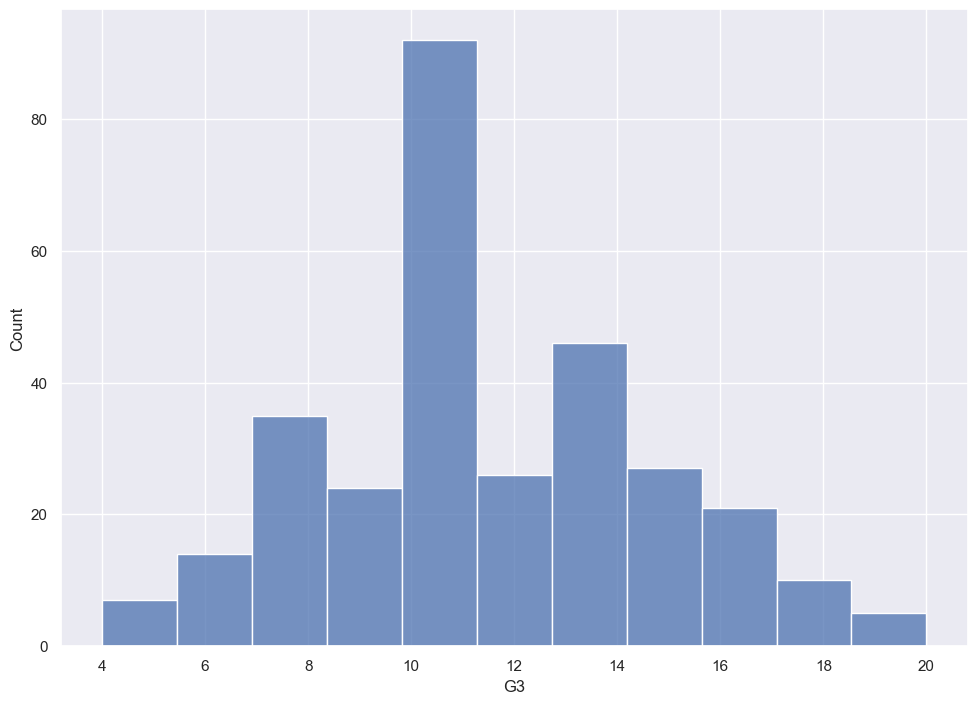

In [7]:
sns.histplot(y_train)

In [8]:
X_y_train = X_train.copy(deep=True)
X_y_train['y'] = y_train

In [9]:
mycorr = X_y_train.corr()['y']

In [10]:
mycorr

age          -0.149753
Medu          0.196975
Fedu          0.166073
traveltime   -0.115788
studytime     0.134976
failures     -0.317971
famrel        0.076104
freetime      0.001402
goout        -0.185176
health       -0.078703
absences     -0.244568
G1            0.891892
y             1.000000
Name: y, dtype: float64

In [11]:
mycorr[abs(mycorr) >= 0.1]

age          -0.149753
Medu          0.196975
Fedu          0.166073
traveltime   -0.115788
studytime     0.134976
failures     -0.317971
goout        -0.185176
absences     -0.244568
G1            0.891892
y             1.000000
Name: y, dtype: float64

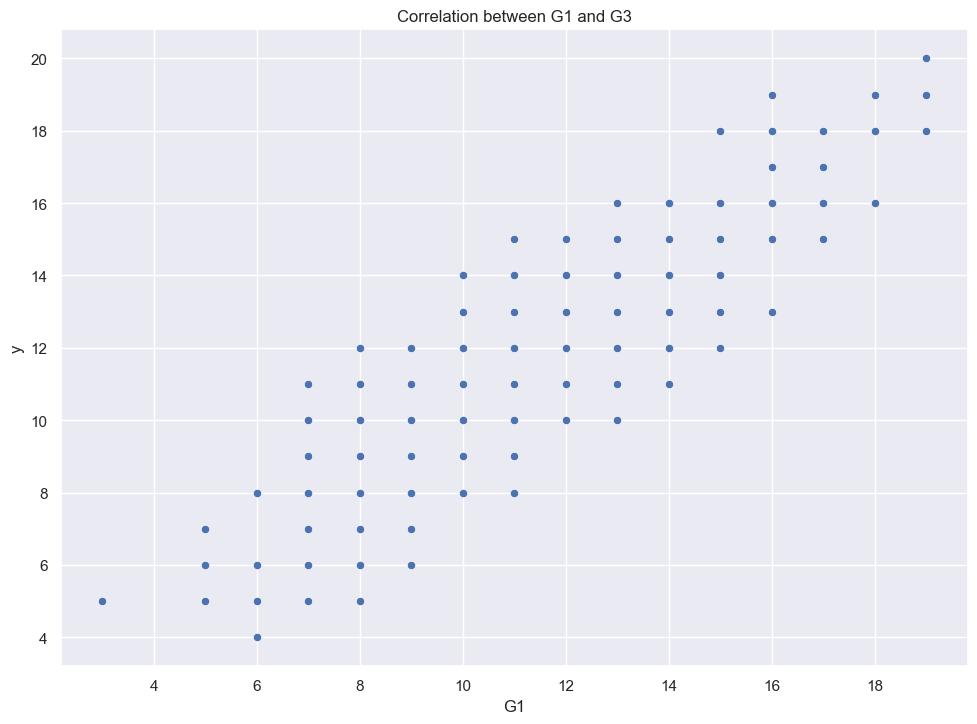

In [12]:
import matplotlib.pyplot as plt

# Basic scatter plot
sns.scatterplot(data=X_y_train, x='G1', y='y')
plt.title('Correlation between G1 and G3')
plt.show()

c:\Users\Kulikovy\AppData\Local\Programs\Python\Python37-32\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Kulikovy\AppData\Local\Programs\Python\Python37-32\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


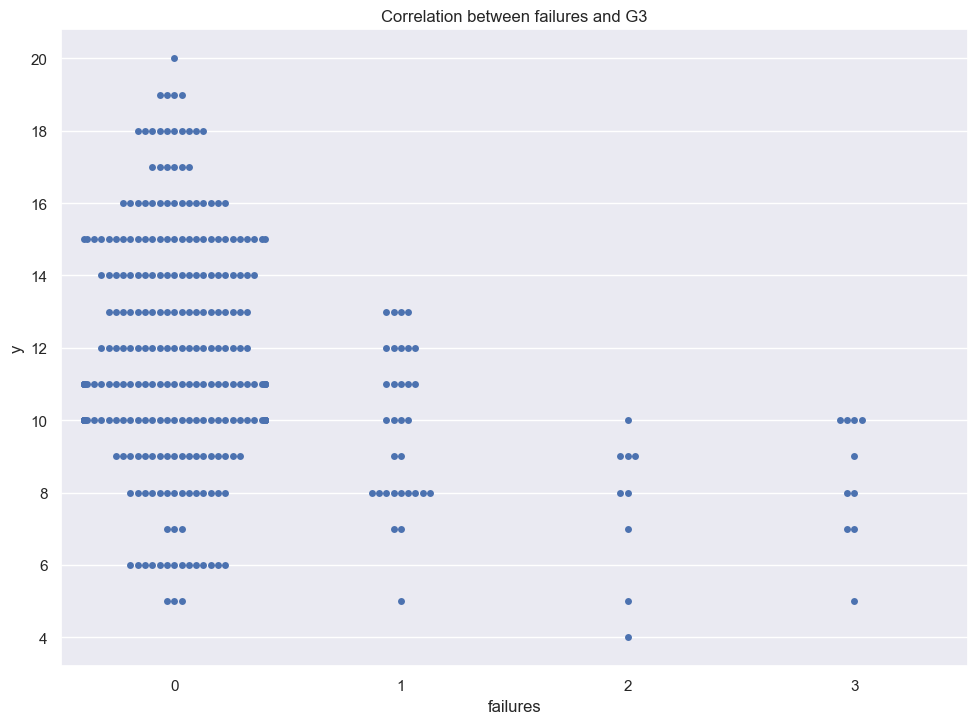

In [13]:
sns.swarmplot(data=X_y_train, x='failures', y='y')
plt.title('Correlation between failures and G3')
plt.show()

In [14]:
from scipy import stats

X_train['urban'] = X_train['address'].map({'R': 0, 'U': 1})

urban_corr, urban_p_value = stats.pointbiserialr(y_train, X_train['urban'])

print(f"Point-Biserial Correlation: {urban_corr:.3f}")
print(f"P-value: {urban_p_value:.4f}")

Point-Biserial Correlation: 0.105
P-value: 0.0667


In [15]:
together_mapping = {'A': 0, 'T': 1}
X_train['together'] = X_train['Pstatus'].map(together_mapping)
together_correlation = y_train.corr(X_train['together'])
print(f"Correlation: {together_correlation}")

Correlation: -0.044769369558874145


In [ ]:
# address and Pstatus are concluded to be unimportant ones

In [16]:
binaries = ['famsup', 'schoolsup', 'paid', 'higher', 'activities', \
             'nursery', 'internet', 'romantic']

for binary in binaries:
    bin_train = X_train[binary].map({'no': 0, 'yes': 1})
    corr, p_value = stats.pointbiserialr(y_train, bin_train)
    print(binary)
    print(f"Point-Biserial Correlation: {corr:.3f}")
    print(f"P-value: {p_value:.4f}")

famsup
Point-Biserial Correlation: -0.093
P-value: 0.1052
schoolsup
Point-Biserial Correlation: -0.251
P-value: 0.0000
paid
Point-Biserial Correlation: -0.033
P-value: 0.5660
higher
Point-Biserial Correlation: 0.097
P-value: 0.0909
activities
Point-Biserial Correlation: 0.071
P-value: 0.2146
nursery
Point-Biserial Correlation: 0.039
P-value: 0.5014
internet
Point-Biserial Correlation: 0.095
P-value: 0.0980
romantic
Point-Biserial Correlation: -0.072
P-value: 0.2054


In [17]:
X_train['up'] = X_train['schoolsup'].map({'no': 0, 'yes': 1})

In [18]:
# schoolsup is concluded to be an important factor

In [19]:
# One-hot encode 'Mjob' column
X_train_mjob = pd.get_dummies(X_train, columns=['Mjob'], prefix='Mjob')
correlation = y_train.corr(X_train_mjob['Mjob_teacher'])
print(f"Correlation: {correlation}")

Correlation: 0.027007680118868546


In [20]:
# One-hot encode 'Fjob' column
X_train_mjob = pd.get_dummies(X_train, columns=['Fjob'], prefix='Fjob')
correlation = y_train.corr(X_train_mjob['Fjob_teacher'])
print(f"Correlation: {correlation}")

Correlation: 0.13393800972258538


In [22]:
print(len(X_train[X_train['Mjob'] == 'teacher']))
print(len(X_train[X_train['Fjob'] == 'teacher']))

# teachers' children are not rare, but do not differ signifiantly from others

49
23


In [23]:
X_train['losttime'] =  X_train['traveltime'] + X_train['goout']

In [26]:
# Two factors with negative correlations are added

In [27]:
correlation = y_train.corr(X_train['losttime'])
print(f"Correlation: {correlation}")

Correlation: -0.21350136103431408


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Important factors of our model
columns_to_scale = ['G1', 'failures', 'up', 'absences', 'losttime']

# Create scaler
scaler = MinMaxScaler()

# Fit and transform selected columns
X_train_short = scaler.fit_transform(X_train[columns_to_scale])

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_short, y_train)

LinearRegression()

In [30]:
y_train_pred = model.predict(X_train_short)
train_mse = ((y_train - y_train_pred) ** 2).mean()
print(f"Training MSE: {train_mse:.4f}")

Training MSE: 1.9957


In [31]:
# Print parameters
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(model.score(X_train_short, y_train))

Coefficients: [13.93298007  0.1284195  -0.133856   -2.88325416 -0.71482983]
Intercept: 4.942794077115755
0.8105836876611587


In [32]:
X_test['losttime'] =  X_test['traveltime'] + X_test['goout']
X_test['up'] = X_test['schoolsup'].map({'no': 0, 'yes': 1})
columns_to_scale = ['G1', 'failures', 'up', 'absences', 'losttime']
X_test_short = scaler.fit_transform(X_test[columns_to_scale])

In [33]:
y_test_pred = model.predict(X_test_short)
test_mse = ((y_test - y_test_pred) ** 2).mean()
print(f"Testing MSE: {test_mse:.4f}")

Testing MSE: 3.4592


In [34]:
print(model.score(X_test_short, y_test))

0.6309980619217861


In [35]:
from sklearn.utils import resample

# Number of bootstrap iterations
n_iterations = 1000

# Arrays to store coefficients
coefs = []
intercepts = []

X_sample_0, y_sample_0 = resample(X_test_short, y_test, replace=True)
print(len(y_sample_0))

for _ in range(n_iterations):
    # Create bootstrap sample (with replacement)
    X_sample, y_sample = resample(X_test_short, y_test, replace=True)
    
    # Fit model
    model = LinearRegression().fit(X_sample, y_sample)
    
    # Store coefficients
    coefs.append(model.coef_)
    intercepts.append(model.intercept_)

50


In [36]:
import numpy as np

# Convert to numpy arrays for easier calculations
coefs = np.array(coefs)
intercepts = np.array(intercepts)

# Calculate statistics
print("Coefficients mean:", np.mean(coefs, axis=0))
print("Coefficients 75% CI:", np.percentile(coefs, [12.5, 87.5], axis=0))
print("Intercept mean:", np.mean(intercepts))
print("Intercept 75% CI:", np.percentile(intercepts, [12.5, 87.5]))

Coefficients mean: [10.2518217  -0.96995607  1.20296787 -1.10071192 -0.7135844 ]
Coefficients 75% CI: [[ 9.30747383e+00 -2.34511279e+00 -9.02056208e-16 -2.22479105e+00
  -1.91798285e+00]
 [ 1.12126380e+01  6.27821896e-01  2.75291609e+00 -1.11739293e-01
   4.98282486e-01]]
Intercept mean: 7.295869616039496
Intercept 75% CI: [6.47166685 8.10864535]


In [ ]:
# Linear regression derived:
# G3 = 7.30 + 10.25 * G1 - 0.96 * failures + 1.20 * schoolsup
#    - 1.10 * absences - 0.71 * (traveltime + goout)
#
# where all factors are rescaled to (0; 1) range.
'''
Определяющим для предсказания годовой оценки G3 является фактор
оценки за первый триместр G1. 

Следущие по величине - бинарный фактор дополнительной образовательной поддержки
schoolsup и число пропусков занятий absences. Наличие дополнительной образовательной 
поддержки ведет к росту годовой оценки, повышения числа пропусков занятий - 
к падению оценки.

Для оставшихся факторов: числа провалов на экзаменах failures и времени на дорогу и на
прогулки (traveltime + goout) полученные отрицательные средние значения
надо принимать с осторожностью, как это следует из доверительных интервалов выше.   
'''